# Introduction to time series

A time series is a series of data points indexed in time order (*usually* at successive equally spaced points in time):

$ts = { y_{1}, y_{2}, …, y_{t} }$

🦋 **What examples of time series can you provide?**

## Preparations

In [ ]:
# Handling data
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import plotly.express as px

# Stationarity tests
from statsmodels.tsa.stattools import adfuller, kpss

# Autocorr test
from statsmodels.stats.diagnostic import acorr_ljungbox

In [ ]:
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [ ]:
def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

## Data

Let's see dataset with data about humidity hourly in various USA cities. You can download the data from [here](https://github.com/tirthajyoti/Deep-learning-with-Python/blob/master/Data/historical-hourly-weather-data/humidity.csv).

The data is present from 2012-10-01 to 2017-11-30.

In [ ]:
humidity = pd.read_csv('humidity.csv')
humidity.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN
1,2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,...,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2,2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,...,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
3,2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,...,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
4,2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,...,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0


In [ ]:
humidity.shape

(45253, 37)

Most simple visualization:

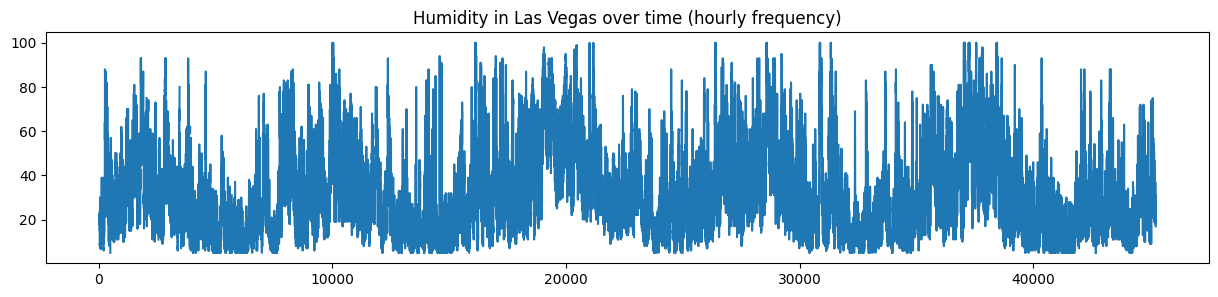

In [ ]:
humidity["Las Vegas"].plot(figsize=(15, 3))
plt.title('Humidity in Las Vegas over time (hourly frequency)')
plt.show()

## Working with dates

### Timestamp and Period

**What are timestamps and periods and how are they useful?**

*Timestamps* are used to represent a point in time.

*Periods* represent an interval in time. Periods can used to check if a specific event in the given period. They can also be converted to each other's form.

In [ ]:
# Creating a Timestamp
timestamp = pd.Timestamp(2017, 1, 1, 4, 20, 42)
timestamp

Timestamp('2017-01-01 04:20:42')

In [ ]:
# Creating a period
period = pd.Period('2017-01-01')
print(period.start_time, '\n', period.end_time)

2017-01-01 00:00:00 
 2017-01-01 23:59:59.999999999


In [ ]:
# Checking if the given timestamp exists in the given period
period.start_time < timestamp < period.end_time

True

In [ ]:
# Converting timestamp to period
period_from_tstamp = timestamp.to_period(freq='h')
period_from_tstamp

Period('2017-01-01 04:00', 'h')

In [ ]:
# Converting period to timestamp
tstamp_from_period = period.to_timestamp(freq='h', how='start') # start indicates the start of the period
tstamp_from_period

Timestamp('2017-01-01 00:00:00')

### date_range

**What is date_range and how is it useful?**

*date_range* is a method that returns  a fixed frequency datetimeindex. It is quite useful when creating your own time series attribute for pre-existing data or arranging the whole data around the time series attribute created by you.

In [ ]:
# Creating a datetimeindex with daily frequency
dr1 = pd.date_range(start='1/1/18', end='1/9/19', freq='D')
dr1

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2018-12-31', '2019-01-01', '2019-01-02', '2019-01-03',
               '2019-01-04', '2019-01-05', '2019-01-06', '2019-01-07',
               '2019-01-08', '2019-01-09'],
              dtype='datetime64[ns]', length=374, freq='D')

In [ ]:
# Creating a datetimeindex with monthly frequency
dr2 = pd.date_range(start='1/1/18', end='1/1/19', freq='MS') # MS - for start of the Month, ME - for the end
dr2

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01'],
              dtype='datetime64[ns]', freq='MS')

In [ ]:
# Creating a datetimeindex without specifying start date and using periods
dr3 = pd.date_range(end='1/4/2014', periods=8)
dr3

DatetimeIndex(['2013-12-28', '2013-12-29', '2013-12-30', '2013-12-31',
               '2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
# Creating a datetimeindex specifying start date , end date and periods
dr4 = pd.date_range(start='2013-04-24', end='2014-11-27', periods=3)
dr4

DatetimeIndex(['2013-04-24', '2014-02-09', '2014-11-27'], dtype='datetime64[ns]', freq=None)

### to_datetime

*pandas.to_datetime()* is used for converting arguments to datetime. Here, a DataFrame is converted to a datetime series.

datetime64[ns] < timestamp

In [ ]:
d = pd.to_datetime('01-01-2017 4:20:42.42', format='%d-%m-%Y %H:%M:%S.%f') # usually format is not required, but sometimes may be helpful
d

Timestamp('2017-01-01 04:20:42.420000')

We can also transform dataframes with *pd.to_datetime*.

In [ ]:
# Create df
df = pd.DataFrame({'year': [2015, 2016], 'month': [2, 3], 'day': [4, 5]})
df

,year,month,day
0,2015,2,4
1,2016,3,5


Note that Timestamp is an extension on datetime64 with additional functions.

In [ ]:
# Convert to datetime
df = pd.to_datetime(df)
df

,0
0,2015-02-04
1,2016-03-05


## Filtering by date

Let's filter humidity for year 2016.

In [ ]:
humidity.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN
1,2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,...,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2,2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,...,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
3,2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,...,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
4,2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,...,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0


In [ ]:
humidity.dtypes[:3]

,0
datetime,object
Vancouver,float64
Portland,float64


🦋 **How to filter 2016 year?**


To filter 2016, we need to convert *datetime* column to *datetime64* with *to_datetime*.

In [ ]:
humidity['datetime'] = pd.to_datetime(humidity['datetime'])
humidity.dtypes[:3]

,0
datetime,datetime64[ns]
Vancouver,float64
Portland,float64


In [ ]:
humidity[humidity['datetime'].dt.year == 2016]

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
28476,2016-01-01 00:00:00,74.0,47.0,69.0,70.0,17.0,28.0,22.0,21.0,39.0,...,82.0,65.0,74.0,61.0,100.0,93.0,100.0,100.0,100.0,93.0
28477,2016-01-01 01:00:00,78.0,47.0,74.0,86.0,22.0,38.0,22.0,26.0,41.0,...,82.0,73.0,74.0,59.0,100.0,88.0,100.0,100.0,100.0,91.0
28478,2016-01-01 02:00:00,100.0,59.0,85.0,92.0,33.0,59.0,34.0,42.0,47.0,...,82.0,100.0,74.0,79.0,100.0,62.0,100.0,100.0,100.0,62.0
28479,2016-01-01 03:00:00,97.0,55.0,80.0,92.0,21.0,53.0,24.0,30.0,47.0,...,82.0,89.0,74.0,69.0,100.0,63.0,96.0,97.0,97.0,62.0
28480,2016-01-01 04:00:00,86.0,55.0,77.0,72.0,27.0,61.0,26.0,29.0,57.0,...,81.0,56.0,79.0,64.0,100.0,71.0,67.0,81.0,81.0,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37255,2016-12-31 19:00:00,100.0,80.0,66.0,86.0,82.0,63.0,81.0,82.0,75.0,...,35.0,33.0,85.0,43.0,84.0,87.0,40.0,93.0,93.0,87.0
37256,2016-12-31 20:00:00,93.0,80.0,62.0,100.0,76.0,67.0,81.0,77.0,70.0,...,48.0,28.0,85.0,51.0,88.0,87.0,43.0,93.0,93.0,87.0
37257,2016-12-31 21:00:00,100.0,80.0,62.0,93.0,87.0,63.0,81.0,72.0,81.0,...,48.0,33.0,78.0,51.0,88.0,81.0,43.0,93.0,93.0,81.0
37258,2016-12-31 22:00:00,100.0,80.0,58.0,93.0,93.0,72.0,81.0,72.0,75.0,...,48.0,41.0,92.0,65.0,88.0,81.0,50.0,100.0,100.0,81.0


In [ ]:
humidity[(humidity['datetime'] >= np.datetime64('2016-01-01'))&(humidity['datetime'] <= np.datetime64('2016-12-31'))]

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
28476,2016-01-01 00:00:00,74.0,47.0,69.0,70.0,17.0,28.0,22.0,21.0,39.0,...,82.0,65.0,74.0,61.0,100.0,93.0,100.0,100.0,100.0,93.0
28477,2016-01-01 01:00:00,78.0,47.0,74.0,86.0,22.0,38.0,22.0,26.0,41.0,...,82.0,73.0,74.0,59.0,100.0,88.0,100.0,100.0,100.0,91.0
28478,2016-01-01 02:00:00,100.0,59.0,85.0,92.0,33.0,59.0,34.0,42.0,47.0,...,82.0,100.0,74.0,79.0,100.0,62.0,100.0,100.0,100.0,62.0
28479,2016-01-01 03:00:00,97.0,55.0,80.0,92.0,21.0,53.0,24.0,30.0,47.0,...,82.0,89.0,74.0,69.0,100.0,63.0,96.0,97.0,97.0,62.0
28480,2016-01-01 04:00:00,86.0,55.0,77.0,72.0,27.0,61.0,26.0,29.0,57.0,...,81.0,56.0,79.0,64.0,100.0,71.0,67.0,81.0,81.0,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37232,2016-12-30 20:00:00,86.0,81.0,24.0,75.0,82.0,76.0,61.0,42.0,52.0,...,48.0,51.0,67.0,39.0,77.0,76.0,58.0,100.0,100.0,76.0
37233,2016-12-30 21:00:00,86.0,70.0,23.0,70.0,76.0,71.0,57.0,40.0,45.0,...,47.0,44.0,62.0,42.0,77.0,76.0,58.0,100.0,100.0,76.0
37234,2016-12-30 22:00:00,80.0,70.0,21.0,70.0,67.0,62.0,53.0,42.0,48.0,...,47.0,86.0,67.0,41.0,77.0,66.0,66.0,100.0,100.0,66.0
37235,2016-12-30 23:00:00,15.0,70.0,22.0,70.0,72.0,67.0,61.0,40.0,45.0,...,40.0,64.0,62.0,38.0,76.0,66.0,100.0,100.0,100.0,66.0


Let's reload the data for more convenient filtering in future.

In [ ]:
humidity = pd.read_csv('humidity.csv', index_col='datetime', parse_dates=['datetime'])
humidity.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN
2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,62.0,...,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,...,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,...,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,62.0,...,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0


In [ ]:
humidity[humidity.index.year == 2016]

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,74.0,47.0,69.0,70.0,17.0,28.0,22.0,21.0,39.0,59.0,...,82.0,65.0,74.0,61.0,100.0,93.0,100.0,100.0,100.0,93.0
2016-01-01 01:00:00,78.0,47.0,74.0,86.0,22.0,38.0,22.0,26.0,41.0,67.0,...,82.0,73.0,74.0,59.0,100.0,88.0,100.0,100.0,100.0,91.0
2016-01-01 02:00:00,100.0,59.0,85.0,92.0,33.0,59.0,34.0,42.0,47.0,61.0,...,82.0,100.0,74.0,79.0,100.0,62.0,100.0,100.0,100.0,62.0
2016-01-01 03:00:00,97.0,55.0,80.0,92.0,21.0,53.0,24.0,30.0,47.0,67.0,...,82.0,89.0,74.0,69.0,100.0,63.0,96.0,97.0,97.0,62.0
2016-01-01 04:00:00,86.0,55.0,77.0,72.0,27.0,61.0,26.0,29.0,57.0,69.0,...,81.0,56.0,79.0,64.0,100.0,71.0,67.0,81.0,81.0,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,100.0,80.0,66.0,86.0,82.0,63.0,81.0,82.0,75.0,55.0,...,35.0,33.0,85.0,43.0,84.0,87.0,40.0,93.0,93.0,87.0
2016-12-31 20:00:00,93.0,80.0,62.0,100.0,76.0,67.0,81.0,77.0,70.0,51.0,...,48.0,28.0,85.0,51.0,88.0,87.0,43.0,93.0,93.0,87.0
2016-12-31 21:00:00,100.0,80.0,62.0,93.0,87.0,63.0,81.0,72.0,81.0,47.0,...,48.0,33.0,78.0,51.0,88.0,81.0,43.0,93.0,93.0,81.0


In [ ]:
humidity.loc['2016-01-01':'2016-12-31']

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,74.0,47.0,69.0,70.0,17.0,28.0,22.0,21.0,39.0,59.0,...,82.0,65.0,74.0,61.0,100.0,93.0,100.0,100.0,100.0,93.0
2016-01-01 01:00:00,78.0,47.0,74.0,86.0,22.0,38.0,22.0,26.0,41.0,67.0,...,82.0,73.0,74.0,59.0,100.0,88.0,100.0,100.0,100.0,91.0
2016-01-01 02:00:00,100.0,59.0,85.0,92.0,33.0,59.0,34.0,42.0,47.0,61.0,...,82.0,100.0,74.0,79.0,100.0,62.0,100.0,100.0,100.0,62.0
2016-01-01 03:00:00,97.0,55.0,80.0,92.0,21.0,53.0,24.0,30.0,47.0,67.0,...,82.0,89.0,74.0,69.0,100.0,63.0,96.0,97.0,97.0,62.0
2016-01-01 04:00:00,86.0,55.0,77.0,72.0,27.0,61.0,26.0,29.0,57.0,69.0,...,81.0,56.0,79.0,64.0,100.0,71.0,67.0,81.0,81.0,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,100.0,80.0,66.0,86.0,82.0,63.0,81.0,82.0,75.0,55.0,...,35.0,33.0,85.0,43.0,84.0,87.0,40.0,93.0,93.0,87.0
2016-12-31 20:00:00,93.0,80.0,62.0,100.0,76.0,67.0,81.0,77.0,70.0,51.0,...,48.0,28.0,85.0,51.0,88.0,87.0,43.0,93.0,93.0,87.0
2016-12-31 21:00:00,100.0,80.0,62.0,93.0,87.0,63.0,81.0,72.0,81.0,47.0,...,48.0,33.0,78.0,51.0,88.0,81.0,43.0,93.0,93.0,81.0


# Visualizations with matplotlib

[Matplotlib](https://matplotlib.org/) is a Python library commonly used for creating visualizations. It provides a wide range of tools to generate line plots, histograms, scatter plots, and other types of graphs. It is widely used in DA, ML.

## Preprocessing

In [ ]:
humidity.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN
2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,62.0,...,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,...,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,...,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,62.0,...,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0


In [ ]:
humidity.isna().sum()

,0
Vancouver,1826
Portland,449
San Francisco,942
Seattle,289
Los Angeles,152
San Diego,344
Las Vegas,842
Phoenix,1308
Albuquerque,710
Denver,1808


Let's fill nans.

In [ ]:
humidity = humidity.iloc[1:] # remove the first empty row
humidity = humidity.fillna(method='ffill') #fill nans with last valid observation
humidity.head()

<ipython-input-142-250fe8f1371b>:2: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,62.0,...,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,...,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,...,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,62.0,...,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 17:00:00,78.0,79.0,84.0,79.0,88.0,80.0,21.0,24.0,49.0,63.0,...,69.0,57.0,80.0,68.0,54.0,62.0,23.0,51.0,51.0,50.0


Let's further explore humidity in Las Vegas.

In [ ]:
humidity_la = humidity["Las Vegas"]
humidity_la.head()

,Las Vegas
datetime,
2012-10-01 13:00:00,22.0
2012-10-01 14:00:00,21.0
2012-10-01 15:00:00,21.0
2012-10-01 16:00:00,21.0
2012-10-01 17:00:00,21.0


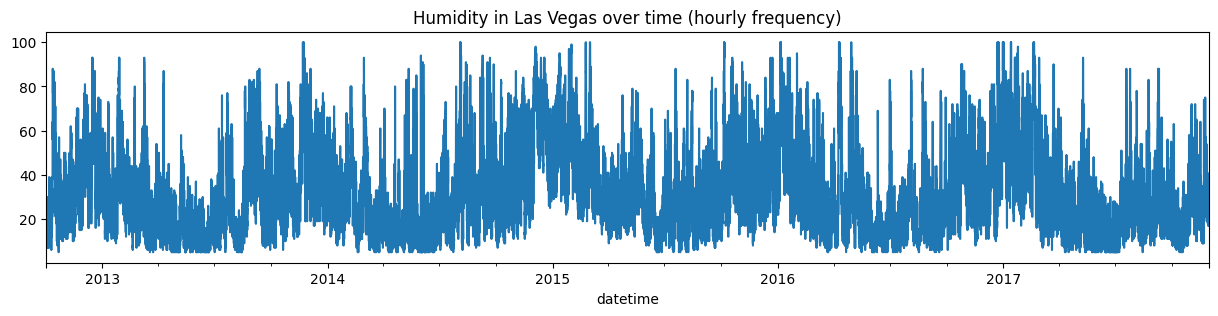

In [ ]:
humidity_la.plot(figsize=(15, 3))
plt.title('Humidity in Las Vegas over time (hourly frequency)')
plt.show()

## Add vertical and horizontal lines

In [ ]:
humidity_la

,Las Vegas
datetime,
2012-10-01 13:00:00,22.0
2012-10-01 14:00:00,21.0
2012-10-01 15:00:00,21.0
2012-10-01 16:00:00,21.0
2012-10-01 17:00:00,21.0
...,...
2017-11-29 20:00:00,18.0
2017-11-29 21:00:00,18.0
2017-11-29 22:00:00,17.0


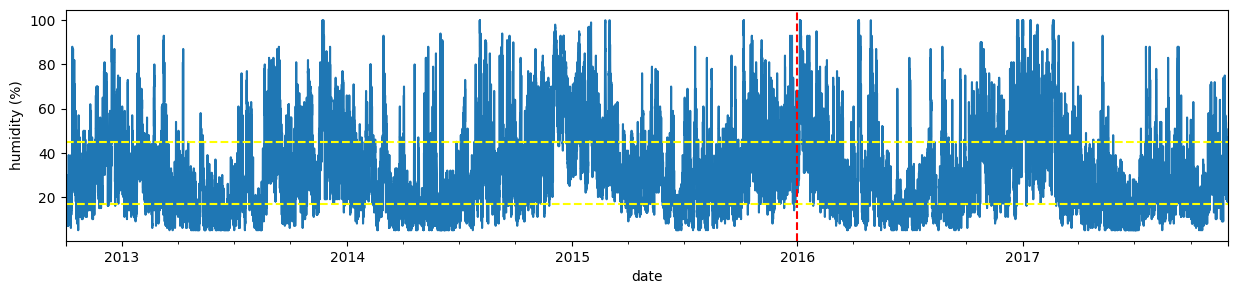

In [ ]:
ax = humidity_la.plot(figsize=(15, 3))
ax.set_xlabel('date')
ax.set_ylabel('humidity (%)')
ax.axvline('2016-01-01', color='red', linestyle='--')
ax.axhline(17, color='yellow', linestyle='--')
ax.axhline(45, color='yellow', linestyle='--')

## Resampling

**Upsampling** - Time series is resampled from low frequency to high frequency(Monthly to daily frequency). It involves filling or interpolating missing data

**Downsampling** - Time series is resampled from high frequency to low frequency(Weekly to monthly frequency). It involves aggregation of existing data.

*asfreq* - just changes frequency skipping or adding values (adding specified with *method*).

In [ ]:
humidity_la.asfreq('D', method='bfill').head()

,Las Vegas
datetime,
2012-10-01 13:00:00,22.0
2012-10-02 13:00:00,18.0
2012-10-03 13:00:00,21.0
2012-10-04 13:00:00,28.0
2012-10-05 13:00:00,22.0


*resample* - changes frequencies with aggregations.

Let's further work with daily aggregations of our data.

In [ ]:
humidity_la = humidity_la.resample('D').mean()

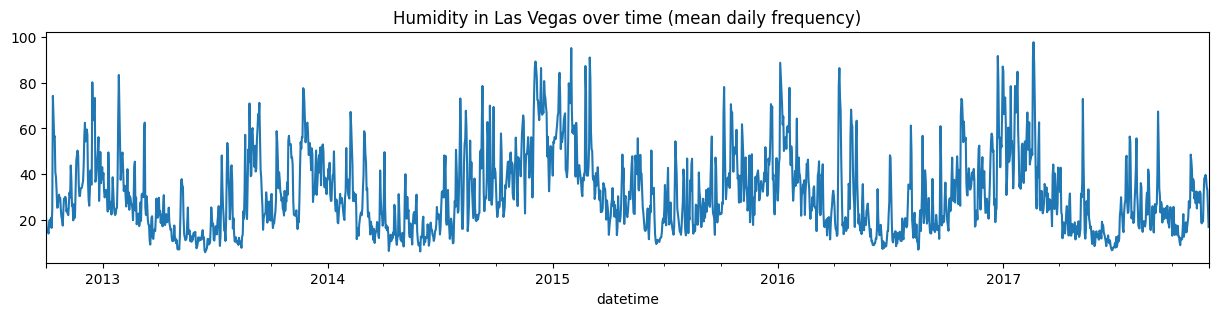

In [ ]:
humidity_la.plot(figsize=(15, 3))
plt.title('Humidity in Las Vegas over time (mean daily frequency)')
plt.show()

## Window functions

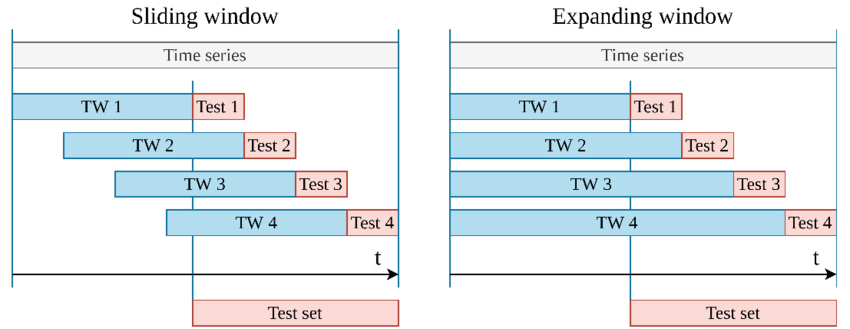

*Expanding window average* is useful for tracking cumulative trends over time. Unlike a fixed window, it continuously adjusts as more data becomes available:

${EWA}_t = \frac{1}{T} \sum_{i=1}^{T} y_{i}$, where $T$ - total number of observations.

In [ ]:
humidity_la_expanding = humidity_la.expanding().mean()

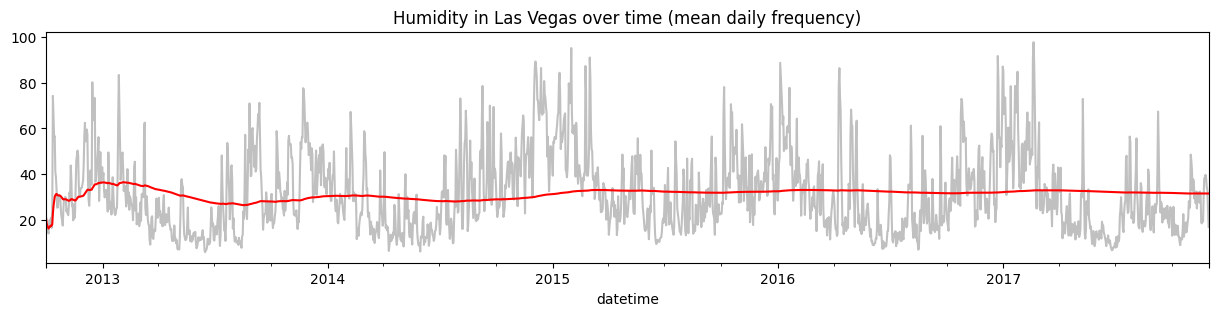

In [ ]:
humidity_la.plot(color='silver',figsize=(15, 3))
humidity_la_expanding.plot(color='red')
plt.title('Humidity in Las Vegas over time (mean daily frequency)')
plt.show()

The data is very volatile. *Smoothing moving average* averages data within the window to reduce fluctuations:

${SMA}_t = \frac{1}{k} \sum_{i=t-k+1}^{T} y_{i}$, where $T$ - total number of observations, $k$ - window size.

Smoothing a time series is used to reduce short-term fluctuations and reveal more stable trends. Real-world data often contains noise—random variations that can obscure main patterns. Smoothing techniques, like moving averages, help to reduce this noise, making data more interpretable and highlighting seasonal and long-term changes more clearly.

Let's smooth our dataframe with a 7-day window.

In [ ]:
humidity_la_smoothed = humidity_la.rolling(window=7).mean()

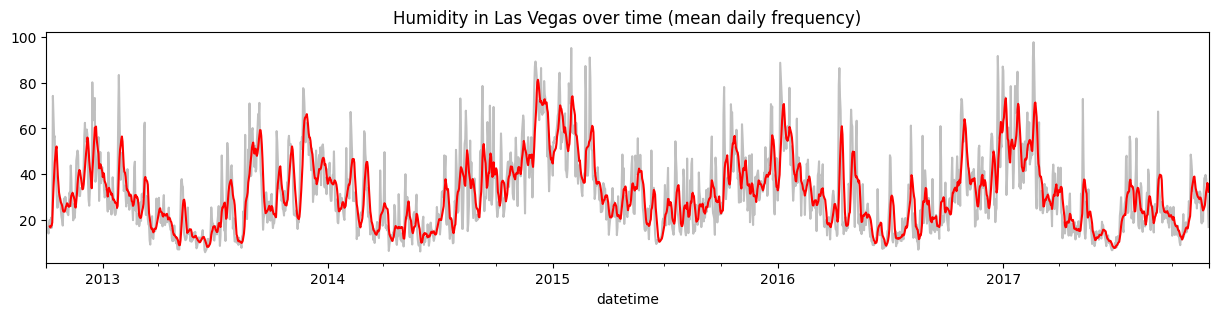

In [ ]:
humidity_la.plot(color='silver',figsize=(15, 3))
humidity_la_smoothed.plot(color='red')
plt.title('Humidity in Las Vegas over time (mean daily frequency)')
plt.show()

Still volatile. Now let's smooth over 4 weeks.

In [ ]:
humidity_la_smoothed = humidity_la.rolling(window=28).mean()

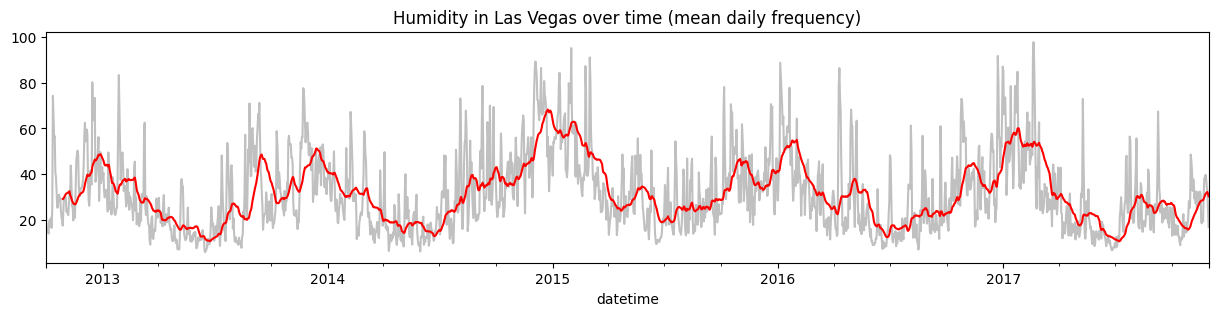

In [ ]:
humidity_la.plot(color='silver',figsize=(15, 3))
humidity_la_smoothed.plot(color='red')
plt.title('Humidity in Las Vegas over time (mean daily frequency)')
plt.show()

🦋 **Assume, which window size may provide a smoother ts.**

## Time series patterns

In [ ]:
humidity_la_smoothed = humidity_la.rolling(window=28*3).mean()

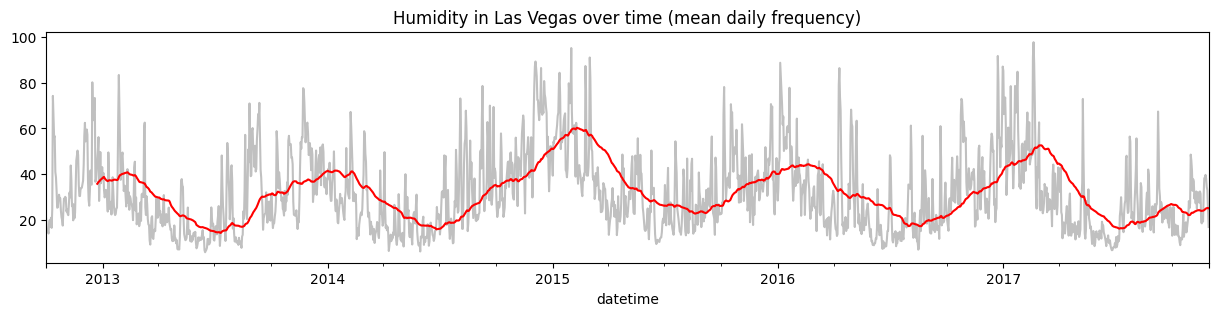

In [ ]:
humidity_la.plot(color='silver',figsize=(15, 3))
humidity_la_smoothed.plot(color='red')
plt.title('Humidity in Las Vegas over time (mean daily frequency)')
plt.show()

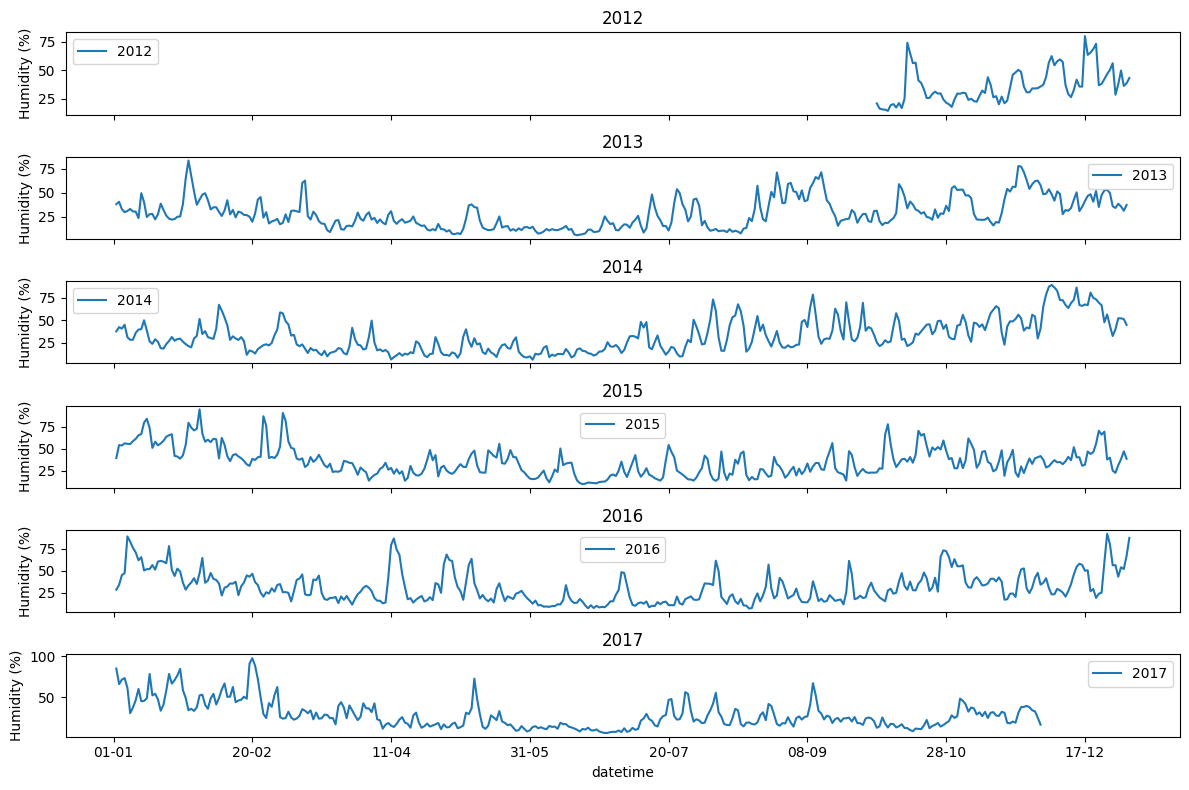

In [ ]:
# Assuming 'humidity_la' is the dataframe with a datetime index and a 'humidity' column
# Group data by year
years = humidity_la.index.year.unique()
fig, axes = plt.subplots(len(years), 1, figsize=(12, 8), sharex=True)

# Plot each year's data on a separate subplot
for i, year in enumerate(years):
    yearly_data = humidity_la[humidity_la.index.year == year]
    axes[i].plot(yearly_data.index.dayofyear, yearly_data, label=f'{year}')
    axes[i].set_ylabel('Humidity (%)')
    axes[i].legend()
    axes[i].set_title(f'{year}')

# Format the x-axis to show day and month
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d-%m'))

# Set common x-axis label
plt.xlabel('datetime')
plt.tight_layout()
plt.show()

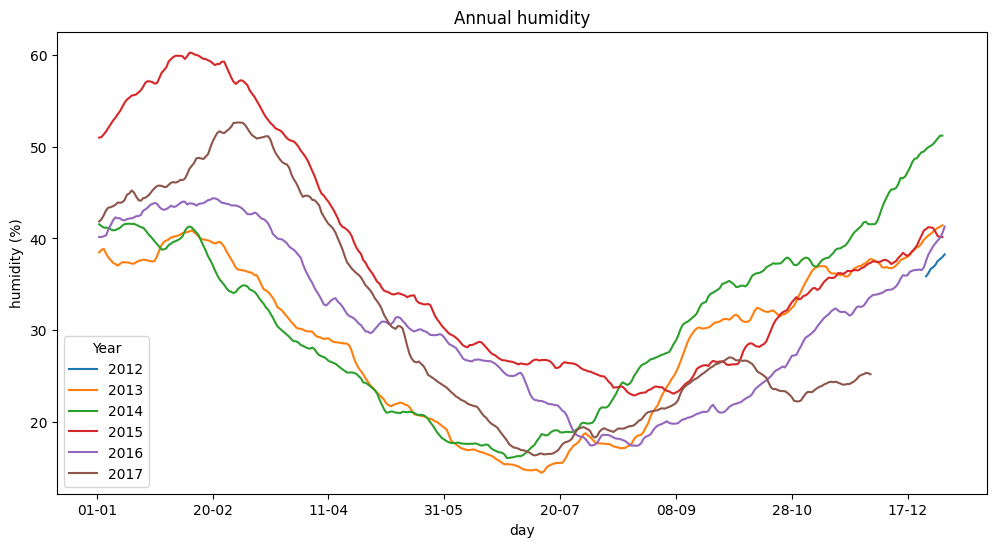

In [ ]:
# Assuming 'humidity_la' is a pandas Series with datetime index
# Extract unique years from the index
years = humidity_la_smoothed.index.year.unique()

plt.figure(figsize=(12, 6))

# Plot each year on the same graph
for year in years:
    yearly_data = humidity_la_smoothed[humidity_la_smoothed.index.year == year]
    plt.plot(yearly_data.index.dayofyear, yearly_data, label=f'{year}')

# Format the x-axis to show day and month
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d-%m'))

# Add labels and legend
plt.xlabel('day')
plt.ylabel('humidity (%)')
plt.title('Annual humidity')
plt.legend(title='Year')
plt.show()

# Visualizations with plotly.express

[Plotly Express](https://plotly.com/python/plotly-express/) is a high-level Python library for creating interactive visualizations. Plotly Express is widely used for its ease of use, quick generation of beautiful interactive plots, and integration with other data analysis tools. It's ideal for visualizing complex datasets and exploring trends in an intuitive and interactive way, making it an excellent choice for data science and business analytics.

In [ ]:
fig = px.line(humidity_la, x=humidity_la.index, y=humidity_la,
              title="Humidity in Las Vegas over time (avg daily frequency)")

fig.update_layout(template='plotly_white', width=800, height=500)
fig.update_xaxes(title_text="date")
fig.update_yaxes(title_text="humidity (%)")
fig.show()

In [ ]:
fig = px.line(title="Humidity in Las Vegas over time (avg daily frequency)")
fig.add_scatter(x=humidity_la.index, y=humidity_la, mode='lines', name='Original Humidity', line=dict(color='silver'))
fig.add_scatter(x=humidity_la_smoothed.index, y=humidity_la_smoothed, mode='lines', name='SMA', line=dict(color='red'))

fig.update_layout(template='plotly_white', width=800, height=500)
fig.update_xaxes(title_text="date")
fig.update_yaxes(title_text="humidity (%)")
fig.show()

In [ ]:
humidity_la_smoothed = humidity_la_smoothed.reset_index()  # reset index to obtain separate column with date
humidity_la_smoothed['year'] = humidity_la_smoothed['datetime'].dt.year
humidity_la_smoothed['day_of_year'] = humidity_la_smoothed['datetime'].dt.dayofyear

fig = px.line(humidity_la_smoothed, x='day_of_year', y=humidity_la_smoothed.columns[1],  # df.columns[1] - is for Las
              color='year',  # group by years
              title="Annual humidity",
              labels={'day_of_year': 'day', humidity_la_smoothed.columns[1]: 'humidity (%)'},
              line_group='year')

fig.update_layout(template='plotly_white', width=800, height=500)
fig.show()

## MoM growth & YoY growth

Year-over-year (YoY) and month-over-month (MoM) growth rates are common indicators in a financial report, as they help track the dynamics and trends of business indicators. MoM analysis allows us to see short-term changes, identify seasonal fluctuations, and gauge responses to recent business initiatives. YoY, in turn, enables comparisons with the same periods in the previous year, which is essential for assessing longer-term trends and seasonal effects. Together, MoM and YoY provide a more comprehensive view of a company's financial health, supporting informed management decisions and strategic adjustments.

$\text{MoM} = \frac{\text{Current Month Value} - \text{Previous Month Value}}{\text{Previous Month Value}} \times 100\%$,

which is same as:

$\text{MoM} = \left( \frac{\text{Current Month Value}}{\text{Previous Month Value}} - 1 \right) \times 100\%
$

In [ ]:
humidity_monthly = humidity_la.resample('MS').mean()

In [ ]:
fig = px.line(humidity_monthly, x=humidity_monthly.index, y=humidity_monthly,
              title="Humidity in Las Vegas over time (avg daily frequency)")

fig.update_layout(template='plotly_white', width=800, height=500)
fig.update_xaxes(title_text="date")
fig.update_yaxes(title_text="humidity (%)")
fig.show()

In [ ]:
humidity_monthly = pd.DataFrame(humidity_monthly)

In [ ]:
humidity_monthly['MoM'] = humidity_monthly['Las Vegas'].pct_change() * 100

In [ ]:
humidity_monthly

,Las Vegas,MoM
datetime,,
2012-10-01,29.075880,NaN
2012-11-01,32.211111,10.782929
2012-12-01,47.879032,48.641356
2013-01-01,35.903226,-25.012633
2013-02-01,31.050595,-13.515862
...,...,...
2017-07-01,24.049731,101.229593
2017-08-01,25.845430,7.466607
2017-09-01,26.838889,3.843847


Prepare a more convenient table.

In [ ]:
humidity_monthly.index = pd.to_datetime(humidity_monthly.index)
humidity_monthly['year'] = humidity_monthly.index.year
humidity_monthly['month'] = humidity_monthly.index.month

# Pivot the data to get years in rows and months in columns
pivot_table = humidity_monthly.pivot_table(index='year', columns='month', values='MoM')


In [ ]:
pivot_table

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.782929,48.641356
2013,-25.012633,-13.515862,-23.611493,-19.602954,-14.164885,-26.942027,116.140272,-0.514821,49.984841,-14.555859,34.981985,-5.238284
2014,-25.325255,-1.426558,-22.621490,-27.958235,4.459866,-15.569856,69.766766,41.443920,12.361539,-14.283662,31.297545,42.558398
2015,-7.627015,-21.059868,-20.597527,-32.623543,27.068633,-41.177268,29.737314,2.523540,12.048389,53.852279,-17.936088,11.813777
2016,29.913736,-33.764324,-27.307405,34.322919,-21.279898,-49.522950,33.653330,38.233326,-7.860972,70.051003,-8.912424,23.654030
2017,25.977628,-3.236164,-45.124857,-29.281147,2.192775,-43.939012,101.229593,7.466607,3.843847,-36.929508,86.490657,NaN


🦋 **Calculate YoY 2015-2016 for New York with the same approach**

In [ ]:
humidity_ny = humidity["New York"]
humidity_ny.head()

,Los Angeles
datetime,
2012-10-01 13:00:00,88.0
2012-10-01 14:00:00,88.0
2012-10-01 15:00:00,88.0
2012-10-01 16:00:00,88.0
2012-10-01 17:00:00,88.0


In [ ]:
humidity_ny.resample('D').mean().resample('YS').mean()

,Los Angeles
datetime,
2012-01-01,63.639040
2013-01-01,59.213128
2014-01-01,62.498059
2015-01-01,61.112557
2016-01-01,63.167919
2017-01-01,67.638972


In [ ]:
humidity_ny.resample('YS').mean()

,Los Angeles
datetime,
2012-01-01,63.494761
2013-01-01,59.213128
2014-01-01,62.498059
2015-01-01,61.112557
2016-01-01,63.167919
2017-01-01,67.672463


In [ ]:
humidity_ny = humidity_ny.resample('D').mean()

In [ ]:
fig = px.line(humidity_ny, x=humidity_ny.index, y=humidity_ny,
              title="Humidity in New York over time (avg daily frequency)")

fig.update_layout(template='plotly_white', width=800, height=500)
fig.update_xaxes(title_text="date")
fig.update_yaxes(title_text="humidity (%)")
fig.show()

In [ ]:
humidity_yearly = humidity_ny.resample('YS').mean()

In [ ]:
fig = px.line(humidity_yearly, x=humidity_yearly.index, y=humidity_yearly,
              title="Humidity in New York over time (avg daily frequency)")

fig.update_layout(template='plotly_white', width=800, height=500)
fig.update_xaxes(title_text="date")
fig.update_yaxes(title_text="humidity (%)")
fig.show()

In [ ]:
humidity_yearly = pd.DataFrame(humidity_yearly)
humidity_yearly['YoY'] = humidity_yearly['New York'].pct_change() * 100

In [ ]:
humidity_yearly

,Los Angeles,YoY
datetime,,
2012-01-01,63.639040,NaN
2013-01-01,59.213128,-6.954712
2014-01-01,62.498059,5.547641
2015-01-01,61.112557,-2.216872
2016-01-01,63.167919,3.363240
2017-01-01,67.638972,7.078044


In [ ]:
humidity_yearly.index = pd.to_datetime(humidity_yearly.index)
humidity_yearly['year'] = humidity_yearly.index.year

# Pivot the data to get years in rows and months in columns
pivot_table = humidity_yearly.pivot_table(columns='year', values='YoY')
pivot_table

year,2013,2014,2015,2016,2017
YoY,-6.954712,5.547641,-2.216872,3.36324,7.078044


H -> D -> Y vs H -> Y?

# Time series features

In [ ]:
humidity_la = humidity["Las Vegas"]
humidity_la.head()

,Las Vegas
datetime,
2012-10-01 13:00:00,22.0
2012-10-01 14:00:00,21.0
2012-10-01 15:00:00,21.0
2012-10-01 16:00:00,21.0
2012-10-01 17:00:00,21.0


## Lags and shifts

We can shift index by desired number of periods with an optional time frequency. This is useful when comparing the time series with a past of itself.

In [ ]:
humidity_la = pd.DataFrame(humidity_la)

In [ ]:
humidity_la['lag_1'] = humidity_la['Las Vegas'].shift(1) # Lag
humidity_la['shift_1'] = humidity_la['Las Vegas'].shift(-1) # Shift
humidity_la

,Las Vegas,lag_1,shift_1
datetime,,,
2012-10-01,20.727273,NaN,16.166667
2012-10-02,16.166667,20.727273,15.458333
2012-10-03,15.458333,16.166667,15.166667
2012-10-04,15.166667,15.458333,14.166667
2012-10-05,14.166667,15.166667,19.125000
...,...,...,...
2017-11-26,38.166667,39.750000,34.458333
2017-11-27,34.458333,38.166667,33.125000
2017-11-28,33.125000,34.458333,25.500000


## Max, Min & Mean

In [ ]:
fig = px.line(humidity_la, x=humidity_la.index, y=humidity_la['Las Vegas'],
              title="Humidity in Las Vegas (avg daily frequency)")

fig.add_hline(y=humidity_la['Las Vegas'].mean(), line=dict(color='red', width=2, dash='solid')) # Mean
fig.add_hline(y=humidity_la['Las Vegas'].max(), line=dict(color='green', width=2, dash='solid')) # Max
fig.add_hline(y=humidity_la['Las Vegas'].min(), line=dict(color='orange', width=2, dash='solid')) # Min

fig.update_layout(template='plotly_white', width=800, height=500)
fig.update_xaxes(title_text="date")
fig.update_yaxes(title_text="humidity (%)")
fig.show()

## Variance and autocovariance

*Variance* - a measure of the dispersion of values around the mean of a series.

It shows how "volatile" or spread out the series is. A higher variance indicates more fluctuation in the values, while a lower variance suggests more consistency or stability in the series.

In [ ]:
# Calculate with numpy
variance = np.var(humidity_la['Las Vegas'], axis=0, ddof=1) #ddof - for N-1 -  Bessel's correction
print(variance)

# Calculate with manually
mean = np.mean(humidity_la['Las Vegas'])
variance = np.sum((humidity_la['Las Vegas'] - mean)**2) / (len(humidity_la['Las Vegas'])-1) # N-1 -  Bessel's correction
variance

290.4782090211602


290.4782090211605

*Autocovariance* - measures the relationship between the values of a series at different time points. For time series, autocovariance is particularly important—it shows the relationship between the series and its lags.

For example, the covariance with lag k shows the relationship between:y[t] and y[t-k].


In [ ]:
def auto_covariance(y, lag=1):
    # Extract mean
    mu = np.mean(y)
    y_centered = y - mu

    # Lags
    y1 = y_centered[lag:]  # Укороченный ряд
    y2 = y_centered[:-lag] # Укороченный лаговый ряд

    # Final calculation
    covariance = np.sum(y1 * y2) / (len(y)-1)

    return covariance

lag1_cov = auto_covariance(humidity_la['Las Vegas'], lag=1)  # covariance with lag 1
print(lag1_cov)

lag2_cov = auto_covariance(humidity_la['Las Vegas'], lag=2)
print(lag2_cov)

403.3403574728056
403.3331356637005


## Stationarity

A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time:

$E(y_t) = \mu < \infty$

$var(y_t) = E((y_t - \mu)^2) = \gamma_0$

$cov(y_t, y_{t-k}) = E\{(y_t - \mu)(y_{t-k} - \mu)\} = \gamma_k$

* Strong stationarity:  is a stochastic process whose unconditional joint probability distribution does not change when shifted in time. Consequently, parameters such as mean and variance also do not change over time.
* Weak stationarity: is a process where mean, variance, autocorrelation are constant throughout the time

Stationarity is important as  non-stationary series that depend on time have too many parameters to account for when modelling the time series.

In [ ]:
super_stationary = [] # stationary
stationary = [] # stationary
nonstationary_trend = [] # not stationary because of trend
nonstationary_seasonality = [] # not stationary because of seasonality
nonstationary_var = [] # not stationary because of variance

for i in range(1000):
    if i == 0:
        super_stationary.append(np.random.normal(loc = 0, scale = 1, size = 1))
    else:
        super_stationary.append(1 + 0.5*super_stationary[i-1] + np.random.normal(loc = 0, scale = 1, size = 1))

for i in range(1000):
    if i == 0:
        stationary.append(np.random.normal(loc = 0, scale = 1, size = 1))
    else:
        stationary.append(1 + 0.99*stationary[i-1] + np.random.normal(loc = 0, scale = 1, size = 1))

for i in range(1000):
    if i == 0:
        nonstationary_trend.append(np.random.normal(loc = 0, scale = 1, size = 1))
    else:
        nonstationary_trend.append(1 + nonstationary_trend[i-1] + np.random.normal(loc = 0, scale = 1, size = 1))

for i in range(1000):
    if i == 0:
        nonstationary_seasonality.append(np.random.normal(loc=0, scale=1, size=1))
    else:
        # Сезонный компонент: синусоида с периодом 500
        seasonal_component = 10 * np.sin(2 * np.pi * i / 500)
        nonstationary_seasonality.append(1 + 0.5*nonstationary_seasonality[i-1] + seasonal_component + np.random.normal(loc=0, scale=1, size=1))

for i in range(1000):
    if i == 0:
        nonstationary_var.append(np.random.normal(loc=0, scale=1, size=1))
    else:
        # Увеличивающаяся дисперсия: шум увеличивается линейно со временем
        variance = 1 + 0.1 * i
        nonstationary_var.append(1 + 0.5*nonstationary_var[i-1] + np.random.normal(loc=0, scale=variance, size=1))

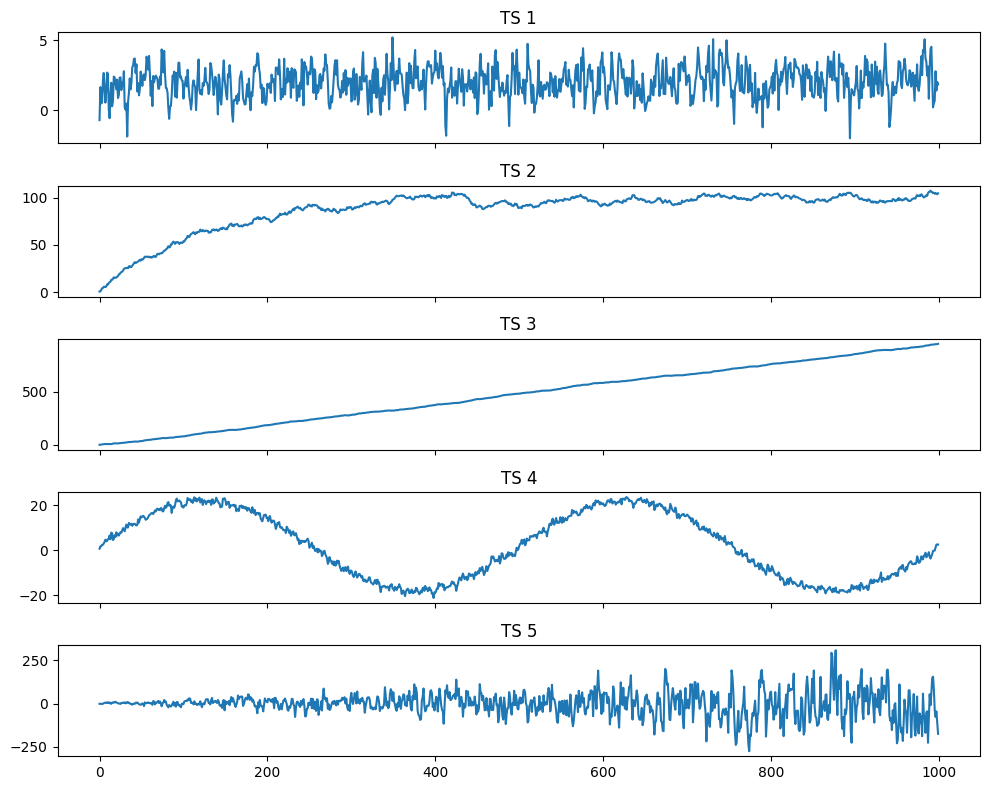

In [ ]:
timeseries = [super_stationary, stationary, nonstationary_trend, nonstationary_seasonality, nonstationary_var]

fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(10, 8), sharex=True)

for i, ts in enumerate(timeseries):
    axs[i].plot(pd.Series(ts), label=f'TS {i+1}')
    axs[i].set_title(f'TS {i+1}')

plt.tight_layout()
plt.show()

### Augmented Dickey-Fuller (ADF) test

Imagine our time series can be described with the model:

$y_t = \alpha \cdot y_{t-1} + \varepsilon_t$

When $\alpha$ = 1 it is called *unit root*.

If $\alpha$ < 1 (e.g., 0.5), the series tends to return to the mean. It's like a swing — the further it moves from the center, the stronger the pull back.

If $\alpha$ = 1 (unit root), each new value = previous value + random shock. The series can "wander" anywhere. It's like a drunk person — each step is in a random direction, and they can end up far from where they started => **time series is not stationary**.

**ADF test** checks the presence of *unit root*.

H(0): There is a unit root (the series is non-stationary).

H(A): There is no unit root (the series is stationary).

**If the null hypothesis can be rejected, we can conclude that the time series is stationary.**

There are two ways to rejects the null hypothesis:

On the one hand, the null hypothesis can be rejected if the p-value is below a set significance level. The defaults significance level is 5%

* <font color='red'>**p-value > significance level (default: 0.05)**</font>: Fail to reject the null hypothesis H(0), the data has a unit root and is <font color='red'>non-stationary</font>.
* <font color='green'>**p-value <= significance level (default: 0.05)**</font>: Reject the null hypothesis H(0), the data does not have a unit root and is <font color='green'>stationary</font>.
    
On the other hand, the null hypothesis can be rejects if the test statistic is less than the critical value.
* <font color='red'>**ADF statistic > critical value**</font>: Fail to reject the null hypothesis H(0), the data has a unit root and is <font color='red'>non-stationary</font>.
* <font color='green'>**ADF statistic <= critical value**</font>: Reject the null hypothesis H(0), the data does not have a unit root and is <font color='green'>stationary</font>.

In [ ]:
adf_test(stationary)

Results of Dickey-Fuller Test:
Test Statistic                -6.263620e+00
p-value                        4.165157e-08
#Lags Used                     1.000000e+00
Number of Observations Used    9.980000e+02
Critical Value (1%)           -3.436919e+00
Critical Value (5%)           -2.864440e+00
Critical Value (10%)          -2.568314e+00
dtype: float64


<font color='green'>**p-value <= significance level (default: 0.05)**</font> => we reject H(0) and our ts is stationary!

### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test


Imagine our time series can be described with the model:

$y_t = \beta_{t} + r_{t} + \varepsilon_t$, where $r_{t} = r_{t-1} + u_{t}$ - *random walk*, $\beta_{t}$ - determined trend.


H(0): The series is stationary.

H(A): The series is non-stationary.

**If the null hypothesis can not be rejected, we can conclude that the time series is stationary.**



The null hypothesis can not be rejected if the p-value is higher than a set significance level. The defaults significance level is 5%

* <font color='green'>**p-value > significance level (default: 0.05)**</font>: Fail to reject the null hypothesis H(0), the time series is <font color='green'>stationary</font>.
* <font color='red'>**p-value <= significance level (default: 0.05)**</font>: Reject the null hypothesis H(0), the time series is <font color='red'>non-stationary</font>.

On the other hand, the null hypothesis can be rejects if the test statistic is less than the critical value.
* <font color='red'>**KPSS statistic > critical value**</font>: Reject the null hypothesis H(0), the time series is <font color='red'>non-stationary</font>.
* <font color='green'>**KPSS statistic <= critical value**</font>: Fail to reject the null hypothesis H(0), the time series is <font color='green'>stationary</font>.

In [ ]:
kpss_test(stationary)

Results of KPSS Test:
Test Statistic            2.766248
p-value                   0.010000
Lags Used                19.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


<ipython-input-3-71884a3c5bdd>:3: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




Oops!  <font color='red'>**p-value <= significance level (default: 0.05)**</font> => reject H(0) and time series is not stationary.

Now about power of KPSS test. The power of a test is the probability of correctly rejecting the null hypothesis when it is false.

**Why does KPSS may have low power:**

**Structural reason:**
The KPSS test checks the null hypothesis of stationarity, which is a complex hypothesis requiring many conditions to be met. It's harder to prove that a series is stationary than that it is non-stationary.

**Technical reason:**
The test relies on regression residuals and requires an estimate of long-term variance, which is often inaccurate with small sample sizes.

**Practical consequence:**
The test may fail to detect non-stationarity, especially if it's weak or the sample size is small, leading to "false stationarity."

**In practice, both ADF and KPSS tests are often used at the same time**:

ADF: H(0) - the series is non-stationary

KPSS: H(0) - the series is stationary

Possible outcomes:

*   DF rejects H0, KPSS does not reject H0 → the series is definitely stationary
*   ADF does not reject H0, KPSS rejects H0 → the series is definitely non-stationary
*   Both tests reject H0 → results are contradictory
*   Both tests do not reject H0 → insufficient data

**If tests cannot agree - it's better to apply a third test (e.g. Phillips–Perron test) and define stationarity by majority of votes** (if 2 tests say that time series is stationary - then say it's stationary and vice versa).

However, let's stick to only **ADF test** for this course.

## Autocorrelation

The next important concept is autocorrelation. This is actually a very simple concept that shows the time-based correlation between values. It is calculated as a normalized covariance:

$$autocorr_{k} = \frac{cov(y_t, y_{t-k})}{var(y_t)}$$  



In [ ]:
def unbiased_variance(y):
    mu = np.mean(y)
    return np.sum((y - mu)**2) / (len(y) - 1)

In [ ]:
def auto_correlation(y, lag=1):
    return auto_covariance(y, lag) / unbiased_variance(y)

In [ ]:
lag1_autocorr = auto_correlation(humidity_la['Las Vegas'], lag=1)  # covariance with lag 1
print(lag1_autocorr)

lag2_autocorr = auto_correlation(humidity_la['Las Vegas'], lag=2)
print(lag2_autocorr)

0.9999832048044555
0.9999653001051622


*Autocorrelation* is a key characteristic of time series, showing how much a series depends on its past values. Why is this important? Because it helps to understand the nature of time series:

*   If autocorrelation fades quickly, the series resembles white noise (independent observations).
*   If it fades slowly, the series may be non-stationary (e.g., random walk).
*   If it is periodic, the series may contain seasonality.

### Ljung-Box test

To test autocorrelations on different lags, Ljung-Box test is usually used.

The essence of the Ljung-Box test is to test the hypothesis that autocorrelations in the series up to lag $m$ are equal to zero. In other words, it checks whether the series is "white noise" or if it contains significant autocorrelations.

The *Ljung-Box test statistic* is calculated using the formula:

$Q = n (n + 2) \sum \frac{\rho^2(k)}{n - k}$,

where $n$ - sample size, $\rho(k)$ - autocorrelation at lag $k$ ($k$ is from 1 to $m$).

**Ljung-Box test** checks the presence of autocorrelations on the first $m$ lags.

H(0): The first $m$ autocorrelations are equal to 0 (the series has no autocorrelation).

H(A): At least one of the first $m$ autocorrelations is not equal to 0.

**If the null hypothesis can be rejected, we can conclude that the time series is autocorrelated .**

The null hypothesis can not be rejected if the p-value is higher than a set significance level. The defaults significance level is 5%

* **p-value > significance level (default: 0.05)**: Fail to reject the null hypothesis H(0), the time series is **not autocorrelated**.
* **p-value <= significance level (default: 0.05)**: Reject the null hypothesis H(0), the time series is **autocorrelated**.

In [ ]:
acorr_ljungbox(humidity_la['Las Vegas'], return_df=True)

,lb_stat,lb_pvalue
1,981.398422,1.984341e-215
2,1942.799283,0.000000e+00
3,2884.846458,0.000000e+00
4,3808.444855,0.000000e+00
5,4713.907434,0.000000e+00
6,5601.075607,0.000000e+00
7,6470.688334,0.000000e+00
8,7322.747810,0.000000e+00
9,8158.804041,0.000000e+00
10,8978.796359,0.000000e+00


🦋 **Calculate ADF, KPSS, Ljung-Box test with the same approach for Los Angeles and make assumptions on stationarity and autocorrelation**

In [ ]:
humidity_las = humidity["Los Angeles"]
humidity_las.head()

,Los Angeles
datetime,
2012-10-01 13:00:00,88.0
2012-10-01 14:00:00,88.0
2012-10-01 15:00:00,88.0
2012-10-01 16:00:00,88.0
2012-10-01 17:00:00,88.0


In [ ]:
humidity_las = humidity_las.resample('D').mean()

In [ ]:
fig = px.line(humidity_las, x=humidity_las.index, y=humidity_las,
              title="Humidity in Los Angeles over time (avg daily frequency)")

fig.update_layout(template='plotly_white', width=800, height=500)
fig.update_xaxes(title_text="date")
fig.update_yaxes(title_text="humidity (%)")
fig.show()

In [ ]:
humidity_las = pd.DataFrame(humidity_las)

In [ ]:
adf_test(humidity_las) # stationary

Results of Dickey-Fuller Test:
Test Statistic                -8.532375e+00
p-value                        1.029402e-13
#Lags Used                     1.400000e+01
Number of Observations Used    1.872000e+03
Critical Value (1%)           -3.433848e+00
Critical Value (5%)           -2.863085e+00
Critical Value (10%)          -2.567593e+00
dtype: float64


In [ ]:
kpss_test(humidity_las) # non-stationary

Results of KPSS Test:
Test Statistic            0.595634
p-value                   0.023033
Lags Used                19.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [ ]:
acorr_ljungbox(humidity_las, return_df=True, lags=100) #autocorrelated

,lb_stat,lb_pvalue
1,1040.817884,2.410486e-228
2,1415.645313,3.949355e-308
3,1531.966161,0.000000e+00
4,1569.240229,0.000000e+00
5,1594.198270,0.000000e+00
...,...,...
96,2076.195909,0.000000e+00
97,2077.516921,0.000000e+00
98,2077.990491,0.000000e+00
99,2078.832553,0.000000e+00


## Outcomes

Autocorrelation and stationarity are crucial for time series analysis because:

*   Autocorrelation helps identify patterns and dependencies between current and past values. It reveals trends, cycles, and seasonality, enabling better forecasting and model fitting.

*   Stationarity ensures the model's assumptions hold. If a series is stationary, its statistical properties (mean, variance) do not change over time, which simplifies analysis and makes models like ARIMA more effective for prediction.

Without these, predictions may be unreliable and models can provide inaccurate results

# SUM UP

* Discussed nature of time series
* Worked with different date formats in python
* Worked with resampling and window functions
* Plotted visualizations with matplotlib and plotly.express
* Calculated simple statistics: mean, max, min, variance, covariance and lags, shifts
* Discussed stationarity and tests for stationarity: ADF, KPSS
* Discussed autocorrelation and test for autocorrelation: Ljung-Box



Please, leave your feedback [here](https://forms.gle/AHyab6LdRtjxGZHT8), let's make our lessons more effective :)